## Bigquery and libraries Setup

In [2]:
from google.cloud import bigquery
import pandas as pd

#This project initializes the BigQuery client to establish a connection between the Python and
#  Google BigQuery
client = bigquery.Client(project='sql-sandbox-435415')

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

---

## Data Selection

Let's preview the first rows and shape of each core table used in this analysis:
- *customer_list*
- *orders*
- *order_items*
- *products*

***customer_list Table***

In [2]:
sql_query ="""
SELECT 
*
FROM 
`sql-sandbox-435415.fecom_crm.customer_list`
"""

query_job = client.query(sql_query)
df_customer_list = query_job.to_dataframe()
df_customer_list.head(5)


,Customer_Trx_ID,Subscriber_ID,Subscribe_Date,First_Order_Date,Customer_Postal_Code,Customer_City,Customer_Country,Customer_Country_Code,Age,Gender
0,66637c0e4a801a4cd3ba72818e7b5b11,35667b792f144ffbcb90d64c5abf26a7,2024-01-30,2024-02-05,AD-AD501,Andorra la Vella,Andorra,AD,18,Female
1,351c4091b6f035cbc49b25c86db368fc,fc6edb96180128815a10afb2297bf552,2022-06-19,2023-03-24,AD-AD503,Andorra la Vella,Andorra,AD,18,Male
2,90f85ef7f6b7f07be42e73c4b8f298b9,4d27b5e8b1dbf35db62bd6891f7fb0fd,2024-03-02,2024-03-05,AT-1010,Vienna,Austria,AT,18,Male
3,35c38243a371dfba016aab0fb4fb0bd6,e8c628af16587ed80263f535a8d95893,2024-07-01,2024-07-12,AT-1010,Vienna,Austria,AT,18,Female
4,fabb645a1aa6ec294fdd9a723e744ee6,d2f4d32a45734d31188beacceeb2d3f6,2022-10-14,2023-10-30,AT-1010,Vienna,Austria,AT,18,Male


In [39]:
# customer_list
df_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102727 entries, 0 to 102726
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer_Trx_ID        99441 non-null   object
 1   Subscriber_ID          102727 non-null  object
 2   Subscribe_Date         102727 non-null  dbdate
 3   First_Order_Date       99441 non-null   dbdate
 4   Customer_Postal_Code   102727 non-null  object
 5   Customer_City          102727 non-null  object
 6   Customer_Country       102727 non-null  object
 7   Customer_Country_Code  102727 non-null  object
 8   Age                    102727 non-null  Int64 
 9   Gender                 102727 non-null  object
dtypes: Int64(1), dbdate(2), object(7)
memory usage: 7.9+ MB


***orders* Table**

In [40]:
sql_query = """
SELECT *
FROM sql-sandbox-435415.fecom_crm.orders
"""
query_job = client.query(sql_query)
df_orders = query_job.to_dataframe()
df_orders.head(5)

,Order_ID,Customer_Trx_ID,Order_Status,Order_Purchase_Timestamp,Order_Approved_At,Order_Delivered_Carrier_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date
0,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2023-02-06 20:18:00+00:00,2023-02-06 20:30:00+00:00,NaT,NaT,2023-03-01 00:00:00+00:00
1,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2023-04-25 01:25:00+00:00,2023-04-30 20:32:00+00:00,NaT,NaT,2023-05-22 00:00:00+00:00
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2022-09-13 15:24:00+00:00,2022-10-07 13:16:00+00:00,NaT,NaT,2022-09-30 00:00:00+00:00
3,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2022-10-22 08:25:00+00:00,NaT,NaT,NaT,2022-10-24 00:00:00+00:00
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2022-10-02 22:07:00+00:00,2022-10-06 15:50:00+00:00,NaT,NaT,2022-10-25 00:00:00+00:00


In [41]:
#df_orders shape:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Order_ID                       99441 non-null  object             
 1   Customer_Trx_ID                99441 non-null  object             
 2   Order_Status                   99441 non-null  object             
 3   Order_Purchase_Timestamp       99441 non-null  datetime64[us, UTC]
 4   Order_Approved_At              99281 non-null  datetime64[us, UTC]
 5   Order_Delivered_Carrier_Date   97658 non-null  datetime64[us, UTC]
 6   Order_Delivered_Customer_Date  96476 non-null  datetime64[us, UTC]
 7   Order_Estimated_Delivery_Date  99441 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](5), object(3)
memory usage: 6.1+ MB


***Order_Items Table***

In [13]:
sql_query = """
SELECT *
FROM sql-sandbox-435415.fecom_crm.order_items
"""
query_job = client.query(sql_query)
df_order_items = query_job.to_dataframe()
df_order_items.head(5)

,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value
0,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2024-05-04 03:55:00+00:00,0.85,18.23
1,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2024-05-02 20:30:00+00:00,0.85,18.23
2,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2024-05-07 02:55:00+00:00,0.85,22.30
3,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2023-07-21 18:25:00+00:00,1.20,7.89
4,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2023-07-21 18:25:00+00:00,1.20,7.89


In [14]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Order_ID             112650 non-null  object             
 1   Order_Item_ID        112650 non-null  Int64              
 2   Product_ID           112650 non-null  object             
 3   Seller_ID            112650 non-null  object             
 4   Shipping_Limit_Date  112650 non-null  datetime64[us, UTC]
 5   Price                112650 non-null  float64            
 6   Freight_Value        112650 non-null  float64            
dtypes: Int64(1), datetime64[us, UTC](1), float64(2), object(3)
memory usage: 6.1+ MB


***products***

In [47]:
sql_query = """
SELECT *
FROM sql-sandbox-435415.fecom_crm.products
"""
query_job = client.query(sql_query)
df_products = query_job.to_dataframe()
df_products.head(5)

,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,df473738565b52f77b4e22b328b41576,Costruction_Tools_Tools,400,16,2,11
1,3fc23ad64a8ee1f1451c8c44932c5d22,Costruction_Tools_Tools,450,20,2,11
2,ef22b718807d8b96162d9b021912f178,Fashion_Male_Clothing,300,16,2,11
3,89f46d1e213867388c2fac6078f5c06d,Fashio_Female_Clothing,500,16,2,11
4,71fddf41cc1719c5550ebc5d0ab86357,Costruction_Tools_Garden,100,16,2,11


In [48]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product_ID             32951 non-null  object
 1   Product_Category_Name  32951 non-null  object
 2   Product_Weight_Gr      32949 non-null  Int64 
 3   Product_Length_Cm      32949 non-null  Int64 
 4   Product_Height_Cm      32949 non-null  Int64 
 5   Product_Width_Cm       32949 non-null  Int64 
dtypes: Int64(4), object(2)
memory usage: 1.6+ MB


# *Analysis*

***Which countries have the highest percentage of returning customers?***

In [3]:
sql_query = """
SELECT 
         Customer_Country AS Country, 
         ROUND((COUNTIF(customer_transaction_number >= 2) /
         COUNTIF(customer_transaction_number >= 1))*100, 2) as customer_returning_pct

FROM
(SELECT

         Subscriber_ID as Customer_Id,
         COUNT(DISTINCT(Customer_Trx_ID)) as customer_transaction_number,
         Customer_Country
FROM sql-sandbox-435415.fecom_crm.customer_list
GROUP BY Subscriber_ID, Customer_Country)

GROUP BY Customer_Country
ORDER BY customer_returning_pct DESC

"""
query_job = client.query(sql_query)
df_returning_customer_rate = query_job.to_dataframe()
df_returning_customer_rate.head(10)

,Country,customer_returning_pct
0,Finland,5.19
1,Croatia,4.58
2,France,3.42
3,Italy,3.38
4,Denmark,3.32
5,Germany,3.25
6,Belgium,3.17
7,Poland,3.04
8,Netherlands,3.02
9,Greece,3.00


Finland and Croatia currently have the highest share of customers who place at least a second order, with Finland above 5% returning customer rate.

However, returning customer percentage alone does not indicate customer value. Countries with high return rates but low order volume or low revenue may not justify increased marketing investment.

---

***Which countries generate the highest lifetime revenue per customer (LTR)?***

*Aliases* df_avg_lifetime_revenue:

Tables
- oi: order_items 
- o: orders	
- cl: customer_list	

Common Table Expression
- orv: order_revenue	 
- cr: customer_revenue c

In [15]:
sql_query = """
-- Total revenue per order (Price)
WITH order_revenue AS(
     SELECT
             oi.Order_ID, 
             SUM(oi.Price) as total_order_revenue
    FROM `sql-sandbox-435415.fecom_crm.order_items` oi
    GROUP BY oi.Order_ID
), 
-- Total lifetime revenue per customer
customer_revenue AS(
      SELECT 
             o.Customer_Trx_ID,
             SUM(orv.total_order_revenue) AS total_customer_revenue
    FROM order_revenue orv 
    INNER JOIN `sql-sandbox-435415.fecom_crm.orders` o ON orv.Order_ID = o.Order_ID
    GROUP BY o.Customer_Trx_ID
)
-- Average customer revenue by country
SELECT 
         cl.Customer_Country,
         ROUND(AVG(cr.total_customer_revenue), 2) AS avg_lifetime_revenue_per_customer,
         COUNT(cr.Customer_Trx_ID) AS total_customers,
         ROUND(SUM(cr.total_customer_revenue), 2) AS total_country_revenue
FROM customer_revenue cr
INNER JOIN `sql-sandbox-435415.fecom_crm.customer_list` cl ON cr.Customer_Trx_ID = cl.Customer_Trx_ID
GROUP BY cl.Customer_Country
ORDER BY  avg_lifetime_revenue_per_customer DESC;
"""

query_job = client.query(sql_query)
df_avg_lifetime_revenue = query_job.to_dataframe()
df_avg_lifetime_revenue.head(12)

,Customer_Country,avg_lifetime_revenue_per_customer,total_customers,total_country_revenue
0,Slovakia,217.02,530,115019.19
1,Luxembourg,198.15,68,13474.30
2,Finland,197.32,81,15982.95
3,Greece,195.41,411,80314.81
4,Croatia,186.53,248,46259.54
5,Sweden,184.48,970,178947.81
6,Latvia,177.86,279,49621.74
7,Slovenia,176.30,493,86914.08
8,Denmark,173.49,901,156310.83
9,Turkey,172.27,482,83034.98


Based on this query, Slovakia, Luxembourg, and Finland have the highest lifetime revenue per customer. Slovakia stands out because it combines a high average LTR with a relatively large customer base (around 530 customers) and a total revenue of about 115k, compared with the much smaller bases in Luxembourg and Finland.

That said, the focus would be on these four countries:

Portugal: very high total revenue and many customers, with only a small gap in average LTR compared with the top countries.

Sweden: high total revenue and many customers, mid returning %, slightly lower LTR.

Denmark: solid total revenue and customer base, with a stronger LTR than Sweden.

Slovakia: highest LTR, plus a decent customer base and strong total revenue.

---

***Which product categories drive lifetime revenue in top markets?***

*Aliases* df_ltr_category_country:

Tables
- oi: order_items 
- o: orders	
- cl: customer_list	
- p: products

Common Table Expression
- ccl: customer_category_lifetime

In [4]:
sql_query = """
 
-- How much each customer has spent per product category
WITH customer_category_lifetime AS (
  SELECT 
       o.Customer_Trx_ID,
       p.product_category_name,
       SUM(oi.Price) as customer_lifetime_revenue_category
  FROM `sql-sandbox-435415.fecom_crm.order_items` oi
  INNER JOIN `sql-sandbox-435415.fecom_crm.orders` o ON oi.Order_ID = o.Order_ID  
  INNER JOIN `sql-sandbox-435415.fecom_crm.products` p ON oi.Product_ID = p.Product_ID
  GROUP BY o.Customer_Trx_ID, p.product_category_name
)


SELECT 

     ccl.product_category_name,
     ROUND(AVG(ccl.customer_lifetime_revenue_category),2) as avg_ltr_from_category,
     ROUND(SUM(ccl.customer_lifetime_revenue_category),2) as total_ltr_from_category
FROM customer_category_lifetime ccl
INNER JOIN `sql-sandbox-435415.fecom_crm.customer_list` cl ON ccl.Customer_Trx_ID = cl.Customer_Trx_ID  
WHERE cl.Customer_Country IN ('Portugal','Denmark','Sweden', 'Slovakia')
GROUP BY ccl.Product_Category_Name
ORDER BY total_ltr_from_category DESC

"""

query_job = client.query(sql_query)
df_ltr_category_country = query_job.to_dataframe()
df_ltr_category_country.head(10)

,product_category_name,avg_ltr_from_category,total_ltr_from_category
0,Health_Beauty,209.96,87763.78
1,Watches_Gifts,263.08,80240.85
2,Computers_Accessories,158.00,40290.06
3,Sports_Leisure,141.26,37716.41
4,Auto,200.61,34504.65
5,Cool_Stuff,200.31,32450.18
6,Furniture_Decor,141.78,29348.13
7,Garden_Tools,212.90,26186.60
8,Baby,196.39,23370.09
9,Telephony,88.85,22212.90


Health_Beauty and Watches_Gifts are the best‑selling categories, so the company should focus on upsell and cross‑sell strategies to boost LTR. For Health_Beauty, a cross‑sell offer could add discounted complementary items when a customer initially buys only one product. For Watches_Gifts, an upsell strategy could target customers who already bought a watch with higher‑end models or related accessories.

# *Charts*

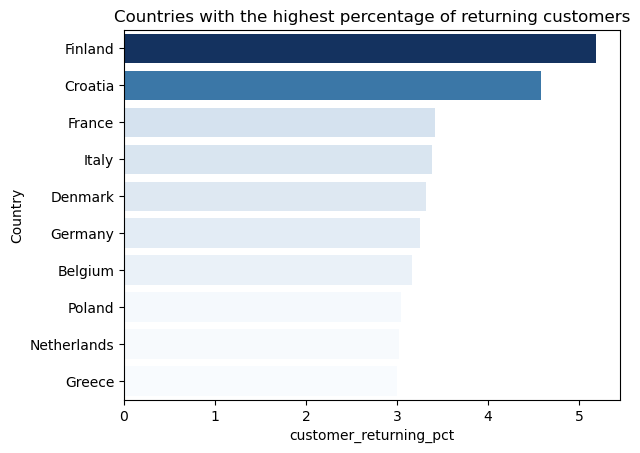

In [12]:
sns.barplot(x='customer_returning_pct', y='Country', data=df_returning_customer_rate.head(10), 
             hue='customer_returning_pct', palette='Blues',legend=False)


plt.title('Countries with the highest percentage of returning customers') 
plt.show()

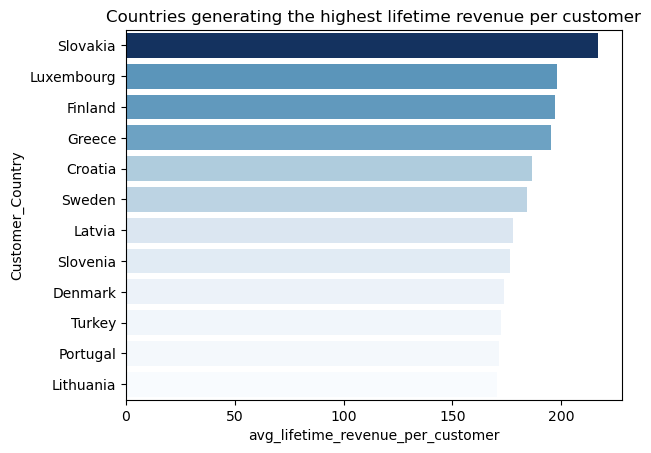

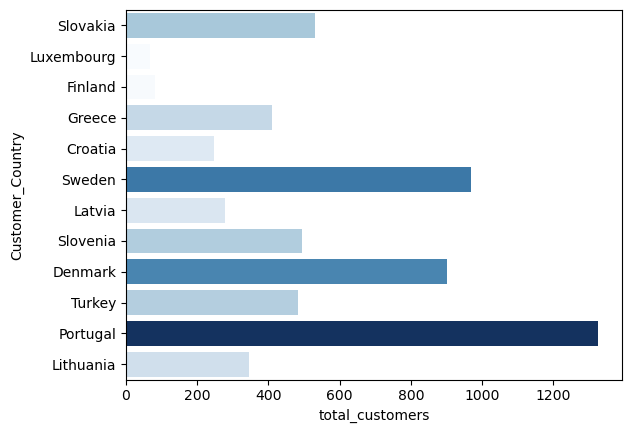

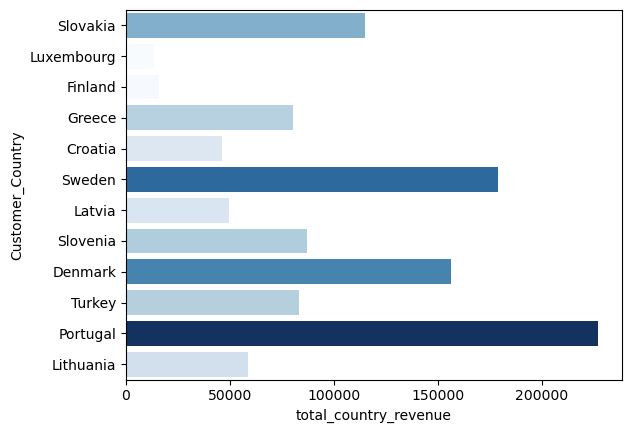

In [ ]:
sns.barplot(x='avg_lifetime_revenue_per_customer', y='Customer_Country', data=df_avg_lifetime_revenue.head(12),
            hue='avg_lifetime_revenue_per_customer', palette='Blues',legend=False)
plt.title('Countries generating the highest lifetime revenue per customer')
plt.show()
sns.barplot(x='total_customers', y='Customer_Country', data=df_avg_lifetime_revenue.head(12),
            hue='total_customers', palette='Blues',legend=False)
plt.show()
sns.barplot(x='total_country_revenue', y='Customer_Country', data=df_avg_lifetime_revenue.head(12),
            hue='total_country_revenue', palette='Blues',legend=False)
plt.show()

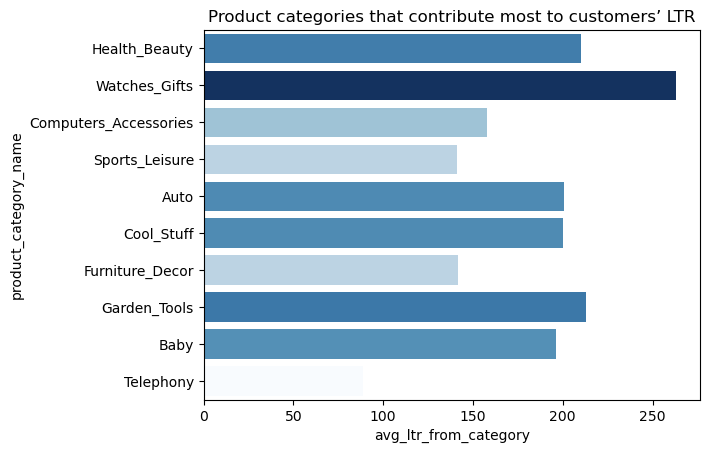

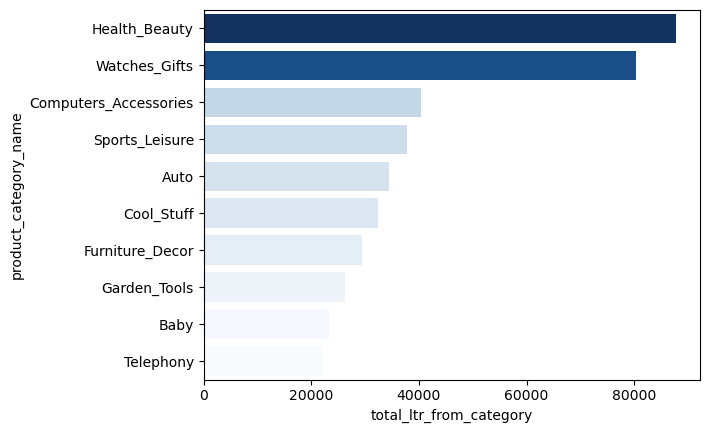

In [13]:
sns.barplot(x='avg_ltr_from_category', y='product_category_name', data=df_ltr_category_country.head(10),
            hue='avg_ltr_from_category', palette='Blues',legend=False)
plt.title('Product categories that contribute most to customers’ LTR') 
plt.show()

sns.barplot(x='total_ltr_from_category', y='product_category_name', data=df_ltr_category_country.head(10),
            hue='total_ltr_from_category', palette='Blues',legend=False)
plt.show()
